## Day 47 Lecture 1 Assignment

In this assignment, we will apply k-means clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [ ]:
# answer goes here

nba = pd.read_csv("nba_player_seasons.csv")



The goal is to cluster these player-seasons to identify potential player "archetypes".

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [ ]:
nba.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,0.357,1.3,4.1,0.323,0.5,1.0,0.500,0.487,0.4,0.4,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,0.222,0.2,1.5,0.133,0.2,0.3,0.667,0.278,0.7,1.0,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,0.345,0.7,2.2,0.338,0.4,1.1,0.361,0.459,0.2,0.3,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [ ]:
# answer goes here

nba_sub = nba.loc[(nba.GS>=20) & (nba.MP>=10)]
nba_sub.head()


,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,10.1,0.596,0.595,1.8,3.7,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,5.7,0.588,0.579,2.0,2.8,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
7,2019,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,15.8,0.528,0.522,4.3,5.1,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3
10,2019,Jarrett Allen,C,20,BRK,80,80,26.2,4.2,7.1,0.590,0.1,0.6,0.133,4.1,6.5,0.629,0.595,2.5,3.5,0.709,2.4,6.0,8.4,1.4,0.5,1.5,1.3,2.3,10.9
12,2019,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,0.433,1.2,3.5,0.343,2.0,3.9,0.514,0.514,1.9,2.1,0.867,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4


Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [ ]:
nba_sub1.shape

(804, 9)

In [ ]:
# answer goes here
nba_sub1 = nba_sub[['PTS','TRB','AST','STL','BLK','TOV','FT','FG','Age']]
nba_sub1.head()




,PTS,TRB,AST,STL,BLK,TOV,FT,FG,Age
3,13.9,9.5,1.6,1.5,1.0,1.7,1.8,6.0,25
4,8.9,7.3,2.2,0.9,0.8,1.5,2.0,3.4,21
7,21.3,9.2,2.4,0.5,1.3,1.8,4.3,8.4,33
10,10.9,8.4,1.4,0.5,1.5,1.3,2.5,4.2,20
12,9.4,7.5,1.3,0.8,0.4,0.9,1.9,3.2,28


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [ ]:
# answer goes here
scale = StandardScaler()
nba_scale = pd.DataFrame(scale.fit_transform(nba_sub1), columns=nba_sub1.columns)
nba_scale.head()


,PTS,TRB,AST,STL,BLK,TOV,FT,FG,Age
0,0.114638,1.612909,-0.617816,1.393220,0.824001,0.023511,-0.281459,0.546897,-0.364288
1,-0.744985,0.768627,-0.330886,-0.050271,0.420162,-0.218831,-0.155144,-0.739659,-1.360505
2,1.386880,1.497780,-0.235242,-1.012598,1.429758,0.144681,1.297476,1.734489,1.628146
3,-0.401136,1.190768,-0.713459,-1.012598,1.833596,-0.461172,0.160643,-0.343796,-1.609560
4,-0.659023,0.845380,-0.761281,-0.290853,-0.387514,-0.945854,-0.218302,-0.838625,0.382874


Run K-means clustering with K = 3 and print out the resulting centroids. When printing the centroids, transform the scaled centroids back into their corresponding unscaled values. What "archetypes" do you see?

In [ ]:
# answer goes here
kmeans = KMeans(n_clusters=3)
kmeans.fit(nba_scale)
centers = kmeans.cluster_centers_
centers_unscaled = pd.DataFrame(scale.inverse_transform(centers), columns=nba_scale.columns)
centers_unscaled.style.background_gradient()



,PTS,TRB,AST,STL,BLK,TOV,FT,FG,Age
0,15.240127,8.616561,1.965605,0.809554,1.229936,1.758599,2.723567,5.903185,25.560510
1,20.225967,5.325967,5.666298,1.323757,0.500000,2.756906,4.100000,7.159669,26.320442
2,9.840987,4.167597,2.126395,0.801931,0.412661,1.236266,1.364378,3.675322,26.821888


Experiment with different values of K. Do any further interesting archetypes come out?

In [ ]:
# answer goes here
kmeans = KMeans(n_clusters=4)
kmeans.fit(nba_scale)
centers = kmeans.cluster_centers_
centers_unscaled = pd.DataFrame(scale.inverse_transform(centers), columns=nba_scale.columns)
centers_unscaled.style.background_gradient()




,PTS,TRB,AST,STL,BLK,TOV,FT,FG,Age
0,14.233333,8.801449,1.905072,0.754348,1.273188,1.702174,2.523188,5.568841,26.094203
1,14.161667,4.285417,3.612500,1.079167,0.358750,1.861250,2.150833,5.243750,25.779167
2,8.223203,4.116013,1.624837,0.692157,0.445098,1.024837,1.101307,3.087255,27.107843
3,23.001667,6.302500,5.816667,1.379167,0.649167,2.966667,5.034167,8.030833,26.608333


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(nba_scale)
centers = kmeans.cluster_centers_
centers_unscaled = pd.DataFrame(scale.inverse_transform(centers), columns=nba_scale.columns)
centers_unscaled.style.background_gradient()

,PTS,TRB,AST,STL,BLK,TOV,FT,FG,Age
0,8.234737,4.360526,1.498421,0.682632,0.536316,1.026842,1.207895,3.128947,23.594737
1,23.027523,6.151376,6.045872,1.405505,0.588073,3.022936,5.027523,8.014679,26.798165
2,14.678049,4.347317,3.791707,1.109268,0.375122,1.949756,2.293659,5.429268,25.151220
3,15.689189,9.345045,2.042342,0.804505,1.402703,1.849550,2.885586,6.096396,25.873874
4,9.600000,4.398942,1.996825,0.744974,0.408995,1.172487,1.256614,3.585185,30.920635


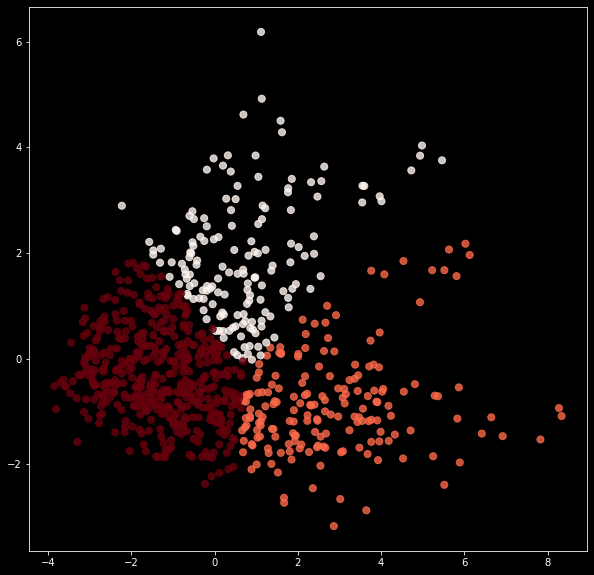

In [ ]:
from sklearn.decomposition import PCA
y_pred = kmeans.predict(nba_scale)

plt.figure(figsize=(10,10))
plt.style.use(['dark_background'])
pca = PCA(n_components=2).fit_transform(nba_scale)
plt.scatter(pca[:,0], pca[:,1], c=y_pred, alpha=.8, cmap='Reds', s=50)
plt.show()